In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression


In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

# Creating a copy
train_og=train.copy()
test_og=test.copy()

In [4]:
# Identifying the dataset
test.head(10)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Checking for null values
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# We can see some missing values in age and cabin in train dataset
# Same goes for test

In [7]:
# Identifying for categorical, numerical variables
train.dtypes
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# So we will predict which passenger would survive based on features of data
# Using other columns as predictors

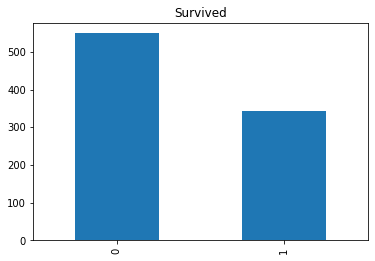

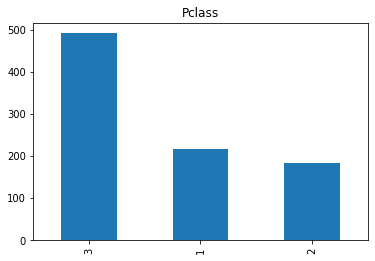

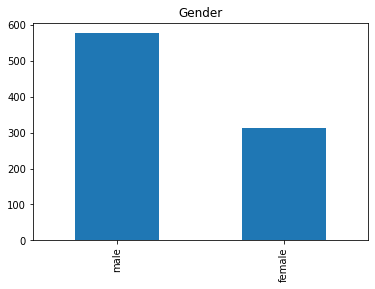

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

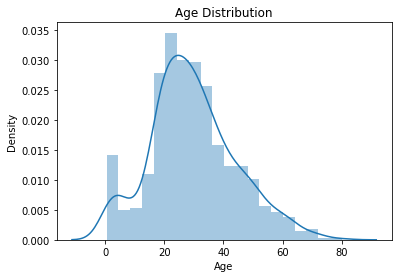

In [9]:
# Visualization part and checking for outliers
# Target variable
train['Survived'].value_counts().plot.bar(title='Survived')
plt.show()
# Predictors
train['Pclass'].value_counts().plot.bar(title='Pclass')
plt.show()
train['Sex'].value_counts().plot.bar(title='Gender')
plt.show()
sn.distplot(train['Age'])
plt.title('Age Distribution')

In [10]:
# As we can see our predictors are fairly normaly distributed
# So there is no need for outliers treatment

<AxesSubplot:>

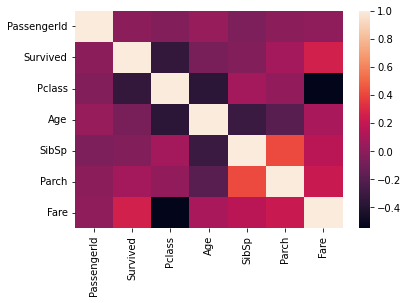

In [11]:
train.corr()
sn.heatmap(train.corr())

In [12]:
# Data Cleaning

impute_value=train['Age'].mean()
train.fillna({'Age':impute_value},inplace=True)

In [13]:
# Removing Columns
train.drop(columns=['Cabin'],axis=1,inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
# We will create some model variables and arrays
train['IsFemale']=(train['Sex']=='female').astype(int)
test['IsFemale']=(test['Sex']=='female').astype(int)


In [16]:
# Creating some model variables and create numpy arrays
predictors=["Pclass","IsFemale",'Age']
X_train=train[predictors].values
X_test=test[predictors].values
y_train=train['Survived'].values

X_train[:5]
y_train[:5]

array([0, 1, 1, 1, 0])

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_predict=model.predict(np.isfinite(X_test))
y_predict[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# Cross validation for parameter tuning to avoid overfitting of data
from sklearn.linear_model import LogisticRegressionCV
model_cv=LogisticRegressionCV(10)
model_cv.fit(X_train,y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass Cs=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


LogisticRegressionCV()

In [20]:
from sklearn.model_selection import cross_val_score
model=LogisticRegression(C=10)
scores=cross_val_score(model,X_train,y_train,cv=4)
scores


array([0.77578475, 0.80269058, 0.77130045, 0.78828829])